LOADING AND READING DATASET

In [1]:
# Import Pandas as pd
import pandas as pd

# Load dataset
file_path = r'C:\Users\SusannaBeatson\Desktop\My Projects\Python - Superstore dataset\Global_Superstore.xlsx'
orders = pd.read_excel(file_path, sheet_name='Orders')
returns = pd.read_excel(file_path, sheet_name= 'Returns')
people = pd.read_excel(file_path, sheet_name= 'People')

orders.head()
#returns.head()
#people.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,ID-0,2016-01-01,2016-01-02,First Class,CUST-0,Home Office,United States,Chicago,New York,10001,East,PROD-0,Technology,Chairs,Product B,191.69,6,0.22,4.70
1,ID-1,2016-01-02,2016-01-03,Same Day,CUST-1,Consumer,United States,Houston,California,10001,West,PROD-1,Office Supplies,Chairs,Product A,460.17,7,0.05,-38.11
2,ID-2,2016-01-03,2016-01-04,Second Class,CUST-2,Consumer,United States,Los Angeles,New York,77001,West,PROD-2,Technology,Chairs,Product B,208.22,8,0.14,195.24
3,ID-3,2016-01-04,2016-01-05,First Class,CUST-3,Home Office,United States,New York,New York,60601,East,PROD-3,Technology,Chairs,Product B,373.29,1,0.04,109.61
4,ID-4,2016-01-05,2016-01-06,Same Day,CUST-4,Consumer,United States,Houston,New York,60601,South,PROD-4,Technology,Phones,Product D,86.84,8,0.11,-49.52


GROUPING AND AGGREGATION

In [2]:
region_sales = orders.groupby('Region')['Sales'].sum().reset_index()
region_sales = region_sales.sort_values(by='Sales', ascending=False)
region_sales


,Region,Sales
0,Central,70987.82
3,West,70944.82
1,East,60972.08
2,South,52692.51


BAR GRAPH VISUALIZING TOTAL SALES BY REGION

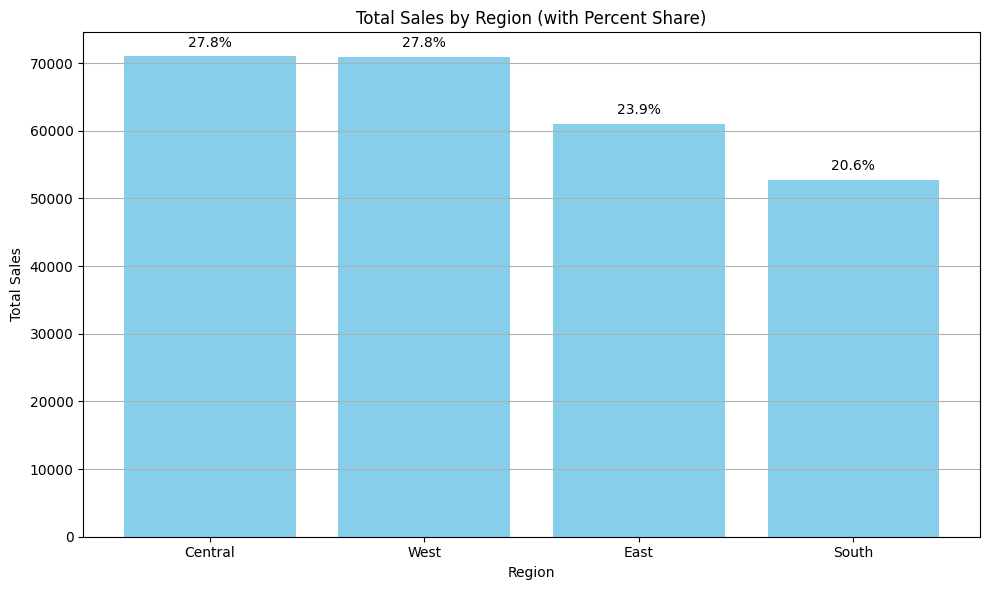

In [4]:
# Import matplotlib as plt
import matplotlib.pyplot as plt

# Add percent of total sales
total_sales = region_sales['Sales'].sum()
region_sales['Percent'] = (region_sales['Sales'] / total_sales) * 100
region_sales['Label'] = region_sales['Percent'].apply(lambda x: f'{x:.1f}%')

# Plot bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(region_sales['Region'], region_sales['Sales'], color='skyblue')

# Add percent labels above each bar
for bar, label in zip(bars, region_sales['Label']):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 1000,
             label,
             ha='center',
             va='bottom',
             fontsize=10,
             color='black')

plt.title('Total Sales by Region (with Percent Share)')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



GROUPING AND AGGREGATION

In [ ]:
# Group by region and sum profit
region_profit = orders.groupby('Region')['Profit'].sum().reset_index()
region_profit = region_profit.sort_values(by='Profit', ascending=False)
region_profit

,Region,Profit
3,West,19649.71
0,Central,19350.16
1,East,17745.68
2,South,17451.47


BAR GRAPH VISUALIZING TOTAL PROFIT BY REGION

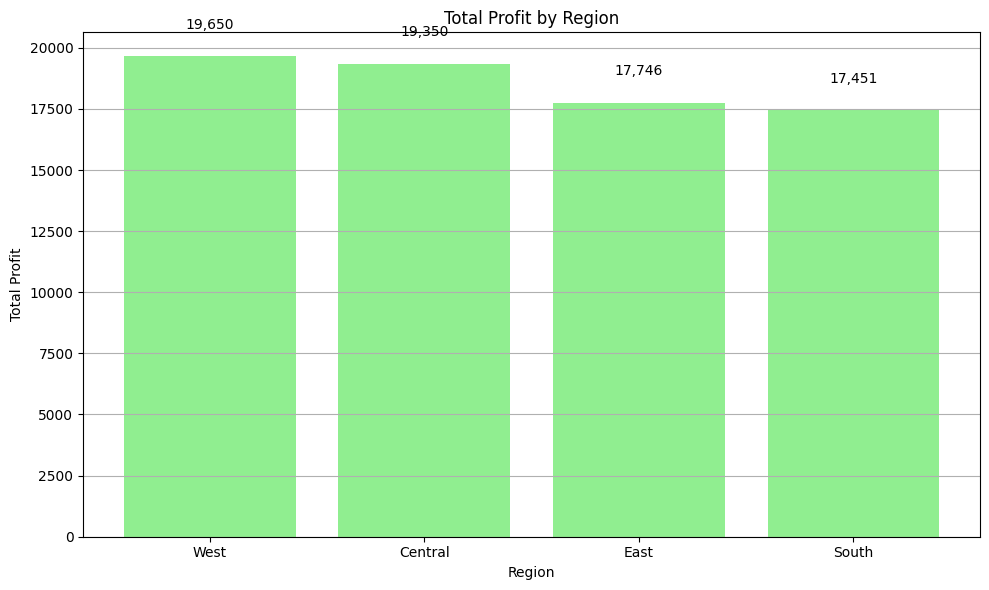

In [6]:
# Plot profit by region
plt.figure(figsize=(10, 6))
bars = plt.bar(region_profit['Region'], region_profit['Profit'], color='lightgreen')

# Annotate each bar with profit values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 1000,
             f'{height:,.0f}',
             ha='center',
             va='bottom',
             fontsize=10,
             color='black')

plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [7]:
# Merge sales and profit data on Region
region_summary = pd.merge(region_sales[['Region', 'Sales']], 
                          region_profit[['Region', 'Profit']], 
                          on='Region')
region_summary


,Region,Sales,Profit
0,Central,70987.82,19350.16
1,West,70944.82,19649.71
2,East,60972.08,17745.68
3,South,52692.51,17451.47


BAR GRAPH COMPARING SALES AND PROFIT BY REGION

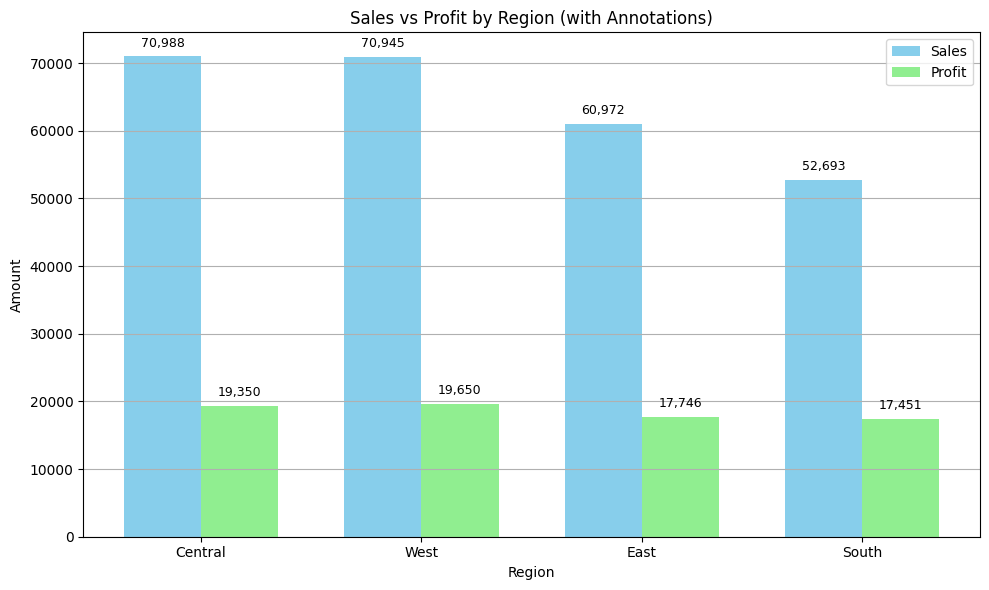

In [9]:
# Plot clustered bar chart
import numpy as np
import matplotlib.pyplot as plt

# Set up x-axis
x = np.arange(len(region_summary['Region']))
width = 0.35

plt.figure(figsize=(10, 6))

# Plot Sales bars
bars1 = plt.bar(x - width/2, region_summary['Sales'], width, label='Sales', color='skyblue')

# Plot Profit bars
bars2 = plt.bar(x + width/2, region_summary['Profit'], width, label='Profit', color='lightgreen')

# Annotate Sales bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 1000,
             f'{height:,.0f}',
             ha='center', va='bottom', fontsize=9)

# Annotate Profit bars
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 1000,
             f'{height:,.0f}',
             ha='center', va='bottom', fontsize=9)

# Titles and labels
plt.xlabel('Region')
plt.ylabel('Amount')
plt.title('Sales vs Profit by Region (with Annotations)')
plt.xticks(x, region_summary['Region'])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

